# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
from keras.optimizers import SGD, RMSprop, Adagrad, Adam
import matplotlib.pyplot as plt
%matplotlib inline

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
Dense = keras.layers.Dense

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            
    out = Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer],output=[out])
    return model

In [7]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  del sys.path[0]


In [8]:
## 超參數設定
OPTIMIZER = [SGD, RMSprop, Adagrad, Adam]
LEARNING_RATE = [1e-1, 1e-3, 1e-5]
EPOCHS = [100]
BATCH_SIZE = [512]
MOMENTUM = [0.9]

In [9]:
cached = {}

class modelFitClass:
    def __init__(self, optimizer, lr, momentum, epochs, batch_size):
        keras.backend.clear_session()
        
        opt = {
            'lr':lr
        }
        if optimizer is 'SGD':
            opt['momentum'] = momentum
            
        self.model = build_mlp(input_shape=x_train.shape[1:])
        self.optimizer = optimizer(**opt)
        self.fit_args = {
            'epochs':epochs,
            'batch_size':batch_size,
            'shuffle':True,
            'verbose':0,
            'validation_split':0.3
        }
        name = 'optimizer={}, lr={}, momentum={}, epochs={}, batch_size={}'\
            .format(optimizer.__name__, lr, momentum, epochs, batch_size)
        print(name)
        cached[name] = self
        
    def fit(self, input):
        x_train, y_train = input
        self.model.compile(
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        optimizer=self.optimizer
        )
        self.history = self.model.fit(x_train, y_train, **self.fit_args)
        
    def plot(self):

        loss = self.history.history['loss']
        val_loss = self.history.history['val_loss']
        acc = self.history.history['acc']
        val_acc = self.history.history['val_acc']

        fig, ax = plt.subplots(1, 2, figsize=(13, 4))

        ax[0].plot(loss, label='train')
        ax[0].plot(val_loss, label='test')
        ax[0].set_ylabel('Loss')
        ax[0].set_xlabel('Epochs')
        ax[0].set_title('Loss')
        ax[0].legend()

        ax[1].plot(acc, label='train')
        ax[1].plot(val_acc, label='test')
        ax[1].set_ylabel('Accuracy')
        ax[1].set_xlabel('Epochs')
        ax[1].set_title('Accuracy')
        ax[1].legend()

        plt.show()
        

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  del sys.path[0]


optimizer=SGD, lr=0.1, momentum=0.9, epochs=100, batch_size=512


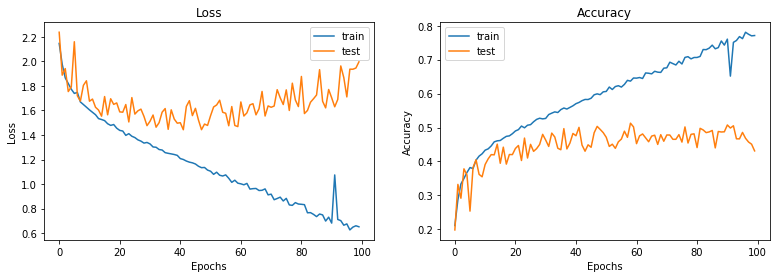

optimizer=SGD, lr=0.001, momentum=0.9, epochs=100, batch_size=512


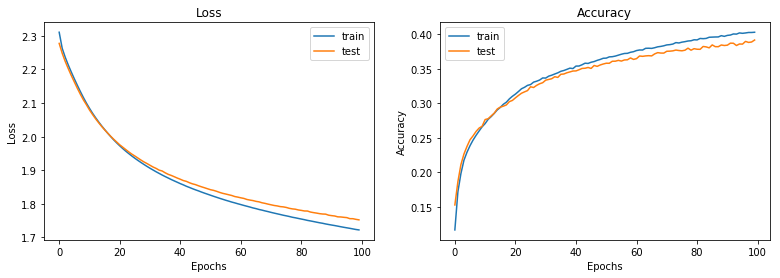

optimizer=SGD, lr=1e-05, momentum=0.9, epochs=100, batch_size=512


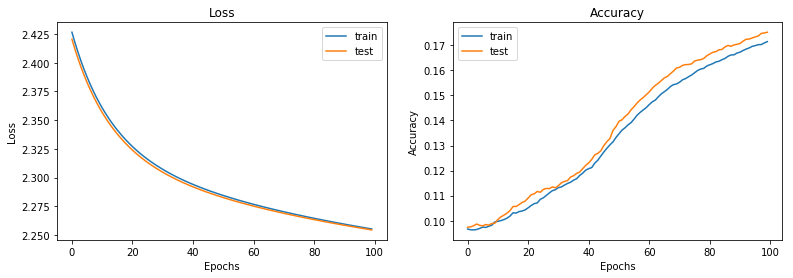

optimizer=RMSprop, lr=0.1, momentum=0.9, epochs=100, batch_size=512


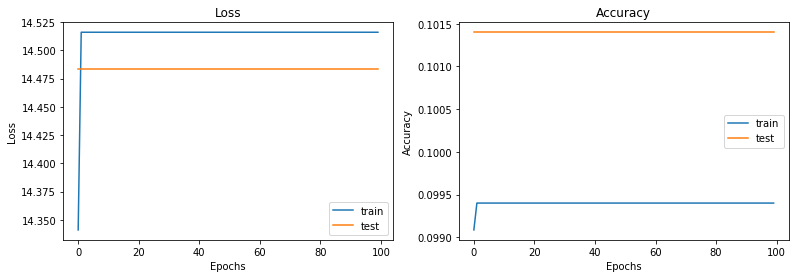

optimizer=RMSprop, lr=0.001, momentum=0.9, epochs=100, batch_size=512


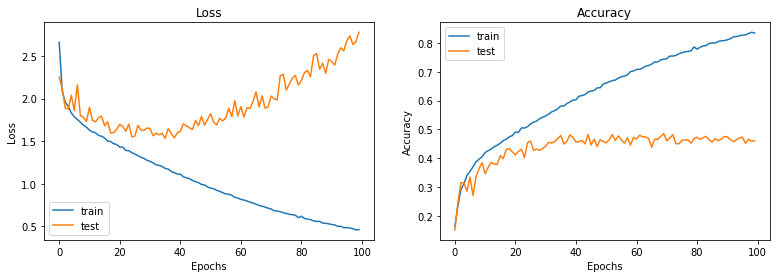

optimizer=RMSprop, lr=1e-05, momentum=0.9, epochs=100, batch_size=512


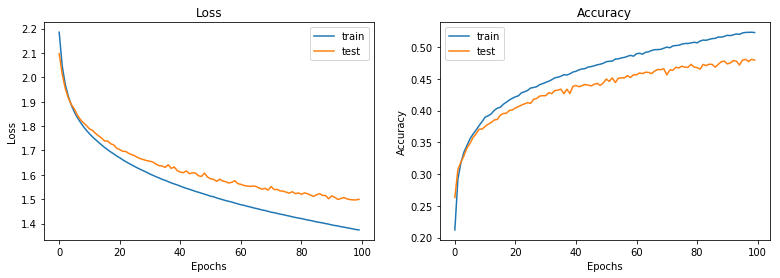

optimizer=Adagrad, lr=0.1, momentum=0.9, epochs=100, batch_size=512


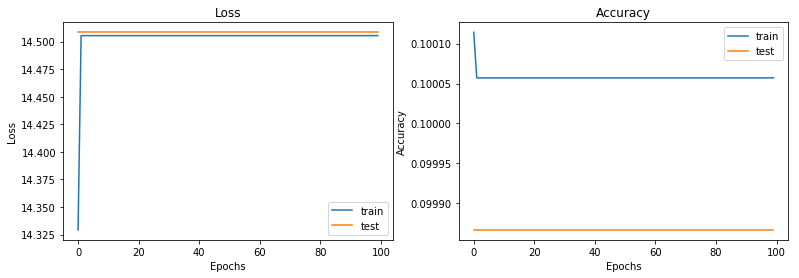

optimizer=Adagrad, lr=0.001, momentum=0.9, epochs=100, batch_size=512


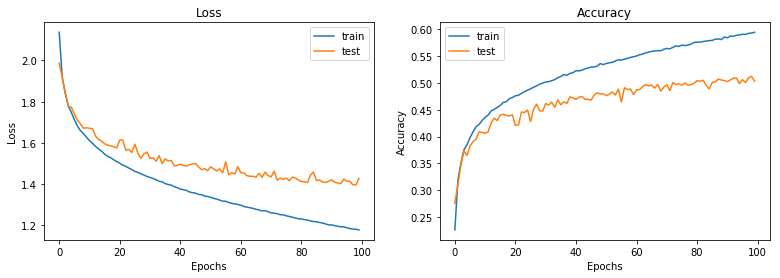

optimizer=Adagrad, lr=1e-05, momentum=0.9, epochs=100, batch_size=512


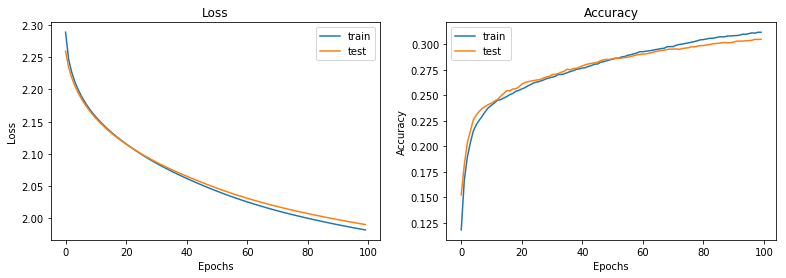

optimizer=Adam, lr=0.1, momentum=0.9, epochs=100, batch_size=512


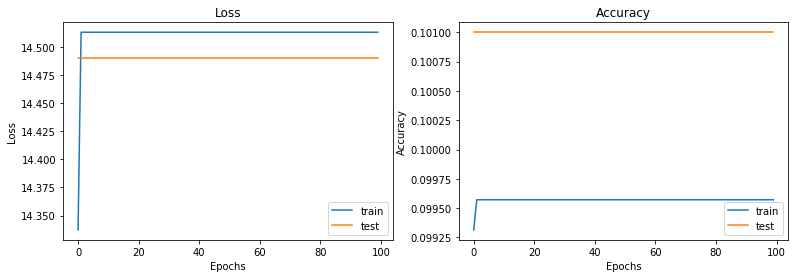

optimizer=Adam, lr=0.001, momentum=0.9, epochs=100, batch_size=512


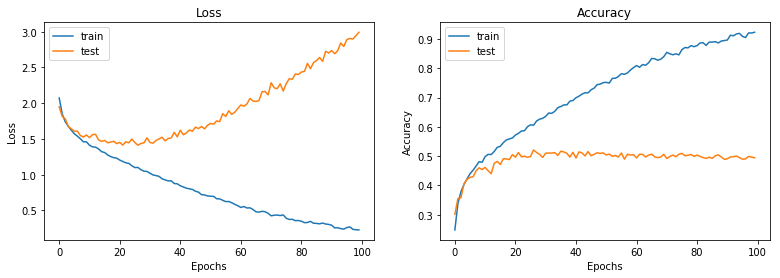

optimizer=Adam, lr=1e-05, momentum=0.9, epochs=100, batch_size=512


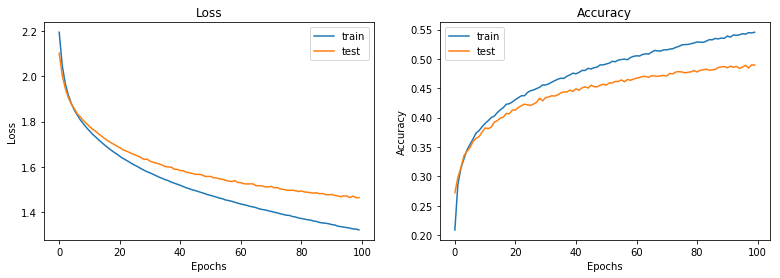

In [12]:
for optimizer in OPTIMIZER:
    for lr in LEARNING_RATE:
        for epochs in EPOCHS:
            for batch_size in BATCH_SIZE:
                for momentum in MOMENTUM:
                
                    modelFit = modelFitClass(
                        optimizer=optimizer,
                        lr=lr,
                        momentum=momentum,
                        epochs=epochs,
                        batch_size=batch_size
                    )
                
                modelFit.fit((x_train,y_train))
                modelFit.plot()